# Week 11: Networks 3 (epidemiology)


While researchers have been modeling the spread of diseases and information for many years, the COVID-19 pandemic playing out right now puts a new emphasis on the importance of being able to model (and thus predict) how diseases propagate through populations. So how do you most effectively model the spread of a disease? There are many^ ways, and all of them (at least the useful ones) involves networks. In this notebook you will get your hands on a couple different modeling approaches. Specifically:

* Spreading processes on static networks
* Spreading processes on temporal networks
* Metapopulation models

**Questions**: Outside of class, use [issue on GitHub](https://github.com/abjer/tsds/issues) for asking questions.

## Imports

In [3]:
%matplotlib inline
import matplotlib.pylab as plt
plt.style.use('ggplot')
import numpy as np
import networkx as nx
import netwulf as nw

## Exercises

In a *contact network* nodes are people and links represent interactions that can happen between people. You can use such a network as a *substrate* for simulating the spreading of "something". Spreading of what? That's up to you. It can be a disease, a behavior, a piece of information, anything you can imagine people may pass along. There's a whole subfield of Network Science which deals with this, but the fundamental idea is actually quite simple:

> Nodes that are connected can transmit this "something" with a probability. Each timestep of the simulation is an opportunity for the "something" to spread.

You can then make this more nuanced by adding extra criteria for transmission. For disease modeling these can e.g. be that nodes can only be infected after multiple exposures or if multiple neighbors are infected, that they can be cured and become resistant/susceptible with some probability, that they may die and exit the simulation creating a void in the network, that becoming infected makes them change their links, that godzilla walks in and eats everyone—the possibilities are endless and you decide which rules exist in the simulation universe.

Generally speaking, there are four major classes of so-called "compartmental models" in network epidemiology:
* *Susceptible-Infected (SI)*: Nodes are susceptible at start, and once they are infected they never recover. This models spreading of unforgetable information, or diseases that people get and pass on, and never recover from (like HIV, herpes, etc.).
* *Susceptible-Infected-Susceptible (SIS)*: Nodes are susceptible, then get infected and stay infected for some time, then get susceptible again, an the cycle continues. This could model things like the flu which comes and goes and you get and recover from over and over again.
* *Susceptible-Infected-Resistant (SIR)*: Nodes become infected and after some time they gain resistance so that they can niether become infected nor spread disease/information further. Once they are resistant they are essentially "removed" from the network, so this type of model works for diseases where people recover and gain resistance as well as ones that kill people, as niether type of person can transmit (measles, chickenpox but also rabies, Creutzfeldt–Jakob disease, etc.).
* *Susceptible-Infected-Resistant-Susceptible (SIRS)*: Probably self-explanatory if you understood the above.

The idea that drives the "compartmenal" modeling approach is that within a population you can assign each
individual to a compartment based on their "state" (infected, susceptible, etc.). When you start the simulation,
individuals then flow between compartments with specific flow rates.

![img](https://upload.wikimedia.org/wikipedia/commons/9/93/SIR_Flow_Diagram.svg)

This then allows us to describe the flow of individuals between compartments (and thus the spreading of the disease)
using differential equations. For example in the simple SIR model shown above, the dynamics can be described with
three differential equations (one for each compartment). They each tell us how fast the population in the corresponding
compartment it changing:

$$\frac{dS}{dt} = -\beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

So at a given point in time how many people are leaving the susceptible compartment and entering the Infected compartment?
Well that's simply the the number of susceptible $S$ times the number of infected $I$ multipled with some disease-specific constant $\beta$.

And what's the growth in the number of infected? Easy! It's just the number of people coming in from the susceptible compartment $\beta SI$ minus all the people leaving for the "Recovered" compartment $\gamma I$, where gamma is some constant that describs how fast people recover.

And the rate at which people enter the recovered state? If you understood the above you can explain this to yourself.

**That's it!**. That's how all compartmental models work!

> **Ex. 11.1.1**: But as I wrote above there are many different types of compartmental models. Write down the rate equations for the SIS model:
>
>![img](https://upload.wikimedia.org/wikipedia/commons/c/cb/SIS_compartment_model.svg)
>
> Follow the reasoning in the example for the SIR model above. Answer the following:
* how many equations you need if there are two compartments.
* What specifically does each equation describe?
* What do $\beta$ and $\gamma$ intuitively describe? What can you say about a disease with a really big $\gamma$? Or a really small $\gamma$? How about big or small $\beta$?

**Answer 11.1.1:** You would need 2 equations to describe the change / growth in the population of the 2 compartments, though the 2 equations are almost similar, but with reversed signs.


To describe the growth/descrease in the susceptible compartment:
$$\frac{dS}{dt} = -\beta SI + \gamma I$$

At any time, the change in the amount of susceptibles is described be the amount of people getting infected ($-\beta SI$ = people leaving the susceptible compartment) and the amount of people recovering from the infection ($+\gamma I$ = people returning to the susceptible compartment).

To describe the growth/decrease in the susceptible compartment:
$$\frac{dI}{dt} = \beta SI - \gamma I$$


Similarly to the change in the susceptible compartmnet, at any time, the change in the amount of infected is described be the amount of people getting infected ($\beta SI$ = people entering the infectious compartment) and the amount people recovering from the infection ($-\gamma I$ = people leaving the infectious compartment)

$\beta$ is an '*infection rate*' and describes the likelihood that the disease will be transmitted from an infected to a susceptible individual in a unit time. A big $\beta$ value indicates that the disease is highly contagious and is easily transmittable from an infected to a susceptible. A small $\beta$ that the likelihood of contagion is small.

$\gamma$ is a '*recovery rate*' and describe the probablity that an infected recover in a unit time (= the fraction of all the infected who recover in a unit change in time). A big $\gamma$ indicates that many of the infected recover from the disease at each time, while a small $\gamma$ value indicates that few of the infected recover from the disease at each unit in time. 

> **Ex. 11.1.2** (optional): If you really understood the above, you should have no trouble writing down the equations for a SIRS
model. Go ahead and try. Hint: You will need to introduce a new constant that describes the rate at which people move from R to S.

1) $\frac{dS}{dt} = -\beta SI + \alpha R$
 
 2) $\frac{dI}{dt} = \beta SI - \gamma I$
 
 3) $\frac{dR}{dt} = \gamma I - \alpha R$
 
 $\alpha R$ describes the amount of people who move from being recovered, to being susceptible again. In equation 3, it is thus with a negative sign as they leave the recovered compartment to reenter the susceptible compartment. $\alpha$ is thus a "from-recovered-to-susceptible" rate or, in other word, an indicator of how long people are immune to the disease after recovering from infection. 

> **Ex. 11.1.3**: Professor of physics and mathematic and all around cool guy, Dirk Brockmann,
makes interactive articles called *Explorables* that introduce ideas in Complexity science. Read/play with
[his explorable](http://www.complexity-explorables.org/explorables/neighbors/) on targeted vaccination to mitigate epidemic spreading in the real world and answer the
following questions:
> 1. In the BA network, roughly what percentage of the population do you have to vaccinate with **strategy A** to only get around 10
infected individuals? What about **startegy B** and **strategy C**?
> 2. **strategy A** and **strategy C** are both entirely random, but one is much more effective than the other. Explain
why. What clever idea is **strategy C** employing?
> 3. Why is this effect larger in the BA network than in the ER network?

**Answer 11.1.3.1:** 
- Strategy A: Though irregular, around 10 infected individuals was the end state when about 75% of the population was vaccinated in a BA network with strategy A.  
- Strategy B: Around 14% vaccination.
- Strategy C: Around 42% vaccination.

**Answer 11.1.3.2:** They exploit the fact that on average, the neighbouring nodes of a randomly chosen node will have higher degrees than the randomly chosen one (called the **friendship paradox**). The goal is to vaccinate nodes with high degrees (Ideally strategy B, but that is not possible), and the reason behind the difference between A and C with regards to reaching that goals is, that in A the probability of picking a node, $n$, is the same for all nodes, $\frac{1}{N}$. In strategy C, the probability of picking a node is proportional to the node's degree. The more degrees a node has, the higher the probability that it is the neighbour to the randomly chosen node.

**Answer 11.1.3.3:** The effect is larger in the BA, because it has a much greater variation in node degrees, which allow some nodes (hubs) to have much higher degree than other, and thus a much higher probability of getting chosen for vaccination. Luckily, these are the nodes we ideally want to vaccinate. The effect of strategy C should thus be more explicit with BA networks.

> **Ex. 11.1.4**: Choose one of these two explorables ([1](http://www.complexity-explorables.org/explorables/herd/) or [2](http://www.complexity-explorables.org/explorables/epidemonic/)) read/play with and understand it, and explain in your own words what phenomenon it communicates.

The number 2 explorable communicates the concept of a SIRS spread (susceptible &rightarrow; infected &rightarrow; recovered &rightarrow; susceptible). This model have three essential rates, the disease rate, the recovery rate and the waning immunity rate. The flu is an example of a disease which has a SIRS spread. Explorable number two further illustrates the two ways the SIRS model can stabilize, either the sickness can dissapear because of either low disease rate, low recovery rate og high waning immunity rate, or it can stabilize (like the flu), and keep moving between a certain percentage of people.

> **Ex. 11.1.5**: The simplest compartmental model is the *SI* model. Below I have implemented a simulation of such a model.
You can see in line 5 that I initialize all nodes in the *S* compartment, but after running, all nodes are in the *I* compartment.
Does this make sense to you?
1. Comment the code abundantly, explaining what's happing at each step.
2. Adapt the code and make a plot of the fraction of infected over time. You may have to restart it a couple of time to make sure patient 0 is someone connected to the rest of the population.
3. Extend the code such after a variable number of timesteps `T_I` infected nodes become susceptible again. Set `T_I = 10` to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see.

In [194]:
G = nx.connected_caveman_graph(10, 5)
#nw.visualize(G) # Uncomment if you want to have a look at the network

In [235]:
#p_I = probability of contamination, n_iter = number of iterations, T_I = recovery time
def infection_model(G,
                    SIS = False,
                    SIRS = False,
                    plot = False,
                    T_I = 10,
                    n_iter = 200,
                    p_I = 0.1,
                    alpha = 5):
        
    R = set()
    I = set() # empty set for infected nodes --> Infectious compartment
    S = set(G.nodes()) # susceptible compartment
    fraction_S, fraction_I, fraction_R, time = [],[],[],[]# list for fraction and time
    recovery_list = [] # list to keep track of when different nodes were infected
    susceptible_list = [] # list to keep track of when different nodes recovered

    patient0 = np.random.choice(list(S)) # Choose random node to infect 

    I.add(patient0) # Add infected node to set, I
    S.remove(patient0) # Remove infected node from the susceptible set. 

    #add patient zero to recovery list
    recovery_list.append(set([patient0]))
    
    for t in range(n_iter): # each loop is equal to "time passing" in the network.
        if (SIS == True or SIRS == True) and (t+1) >= T_I: # For the first T_I loops, nothing shall happen.
            if recovery_list[-T_I] == set(): # sometimes noone gets infected --> empty set
                if SIRS == True: susceptible_list.append(recovery_list[-T_I]) # append recovered to suscep-list
                del recovery_list[-T_I] # delete the element from the list
            else:
                if SIRS == True: # Append to susceptible list to keep track of who recovered when
                    susceptible_list.append(recovery_list[-T_I])
                for infected in recovery_list[-T_I]: # Take the (t-T_I)'th element
                    if SIRS == True:
                        I.remove(infected) #removed the element from T_I loops ago, from infected   
                        R.add(infected) #Add elements from T_O iteration ago to susceptible
                    else:
                        I.remove(infected) #removed the element from T_I loops ago, from infected   
                        S.add(infected) #Add elements from T_O iteration ago to susceptible                        
                del recovery_list[-T_I] # delete the element from the list
        
        ################# FROM R TO S ##############################
        if SIRS == True and (t+1) >= (alpha + T_I): # When enough time has passed for patient 0 to have been
                                   # recovered (T_I) and go back to susceptible again (alpha)
            if susceptible_list[-alpha] == set():
                del susceptible_list[-alpha]
            else:
                for recovered in susceptible_list[-alpha]:
                    R.remove(recovered)
                    S.add(recovered)
                del susceptible_list[-alpha]

        
        ################## Fractions #############################
        fraction_I.append(len(I)/len(G.nodes())) # calc and append fraction of infected
        fraction_S.append(len(S)/len(G.nodes())) 
        if SIRS == True: fraction_R.append(len(R)/len(G_t.nodes()))
        time.append(t) # append time / iteration

        infected_total_t = set() # container for all the nodes who will get infected at time t
        for infected_node in list(I): # Loop over the infected nodes
            # Select neighbors of the infected node
            neighbors = G.neighbors(infected_node) 
            # Infect the neighbours with probability < p_I
            infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
            # Only take the ones that are not already infected (not already in I)
            infected_neighbors -= I
            if SIRS == True:
                infected_neighbors -= R
            #Add the new infected neighbors to the total container
            infected_total_t |= infected_neighbors
            # Add the new infected nodes 
            I |= infected_neighbors
            # Remove the (new) infected from the susceptible compartment
            S -= infected_neighbors
        #Add set of all the newly infected nodes at time t.   
        recovery_list.append(infected_total_t)
        
    if plot == True:
        #Plot fraction of infected
        plt.style.use('ggplot')
        plt.figure(figsize = (12,8))
        plt.xlabel('Time', size = 15)
        plt.ylabel('Fraction', size = 15)
        plt.title('Fraction of infected over time (SI)')
        if SIS == True:
            plt.title('Fraction of infected over time (SIS)')
        if SIRS == True:
            plt.title('Fraction of infected, susceptible and recovered over time (SIRS)')
            plt.scatter(time,fraction_S, c = 'g')
            plt.scatter(time,fraction_R, c = 'b')  
        plt.scatter(time,fraction_I, c = 'r')
        plt.show()

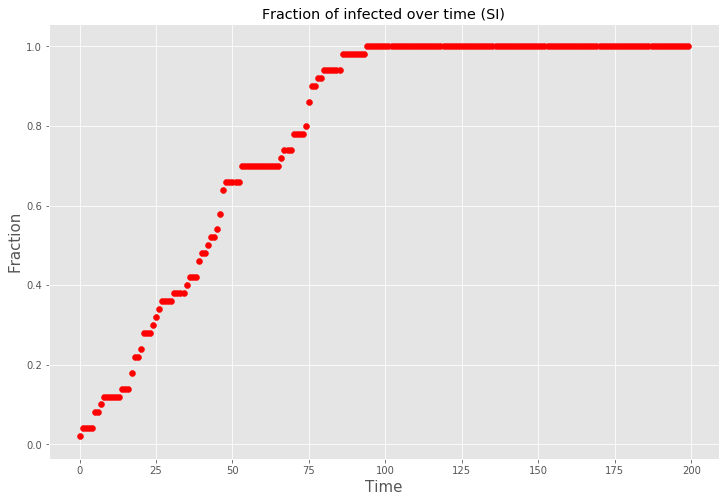

In [204]:
#SI-model
infection_model(G, plot = True)

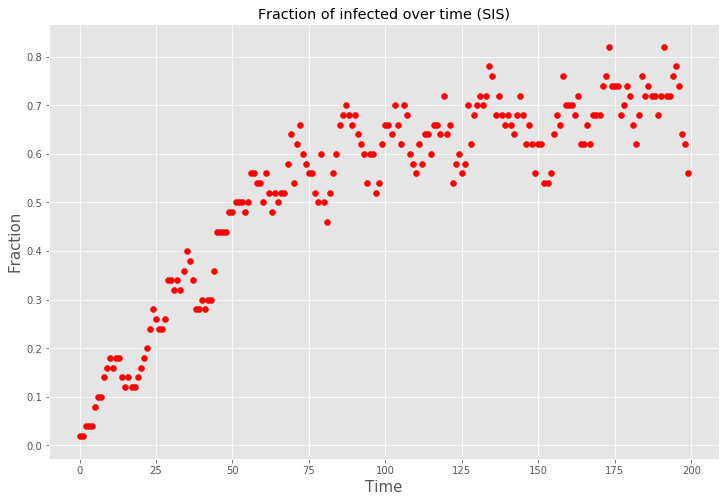

In [205]:
infection_model(G, SIS=True, plot=True, T_I = 10, n_iter = 200)

The endstage looks endemic where around 70% of the population is infected. 

> **Ex. 11.1.6**: Use what you have learned and implement an SIRS model.
* Run it on the Facebook network from last week (so load that into a `networkx.Graph`).
* Record the fraction of infected, susceptiple and recovered over time.
* After the simulation has run, plot these quantities over time and comment on your results
* Be proud of yourself for having solved a really interesting problem.

In [223]:
import pandas as pd
# Import facebook network
data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

#Slice network (Subset - only 10 days back)
def slice_data(t0_in=7, t1_in=0):
    t0 = data.timestamp.max() - 86400 * t0_in  # Lower bound of time-slice (t0_in days before last wall post)
    t1 = data.timestamp.max() - 86400 * t1_in   # Upper bound of time-slice (t1_in days before last wall post)

    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.Graph)
    return G_t



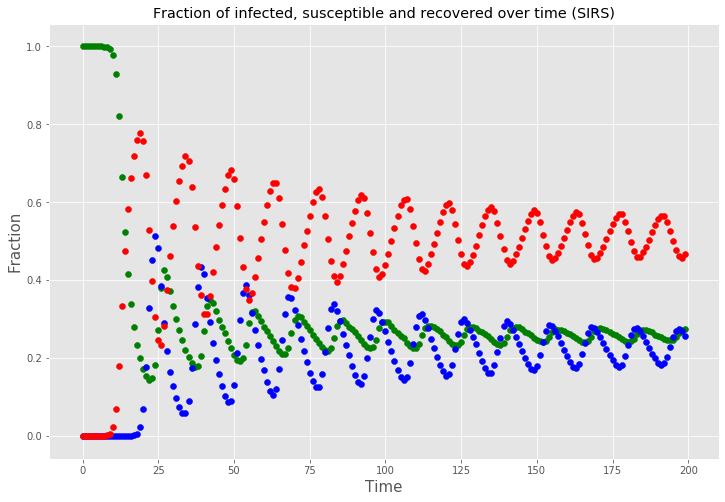

In [243]:
# the SIRS model on facebook data (might have to be run a couple of time
# since the infection has a tendency to die out quickly at the low p_I
G_t = slice_data(t0_in = 365)
infection_model(G_t, SIRS=True, plot=True, T_I = 10, n_iter = 200, p_I=0.2, alpha = 5)

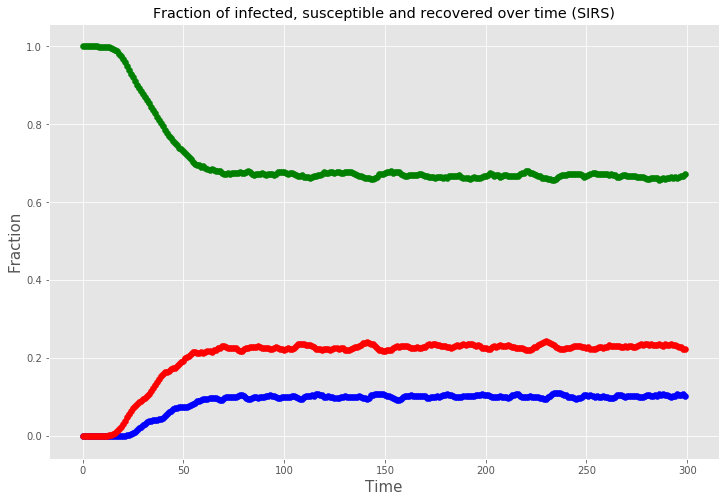

In [221]:
# the SIRS model on facebook data (might have to be run a couple of time
# since the infection has a tendency to die out quickly at the low p_I
infection_model(SIRS=True, plot=True, T_I = 10, n_iter = 300, p_I=0.2, alpha = 5, t_0 = 10)

### Further learning

Since the above exercises teaches you how to write down epidemic models (as systems of differential equations)
and subsequently teaches you how to simulate a spreading process on a network to obtain data on infected/susceptible/recovered
over time, you would think it natural that I also taught you how to fit these epidemic models to such data.
This, however, is going a bit too far as this is not a course in computational epidemiology. But if you want to
figure out how to do it, you literally just need to Google search for "fit SIR model".

And finally, a note on how these models are used in the real world. The state-of-the-art in epidemiological modeling is something called "meta popultion models". They are essentially systems of compartmental models. One component in such a model may be a country, and it has its own little SI, SIR or SIRS model. Components are then coupled because there are people moving between them. The paper *The Hidden Geometry of Complex,
Network-Driven Contagion Phenomena* by Dirk Brockmann and Dirk Helbing published in Science in 2013 ([link here](https://www.dropbox.com/s/hxprfyr51fwh907/brockmann13.pdf?dl=0)) sets up such a model for the world using airline traffic as a proxy for people flow between countries. It is a must read if you
are curious about how the pros predict things like when a disease will arrive in a certain place or where a disease originated. I strongly recommend reading it and understanding the figures, it is a stroke of genius.